<a href="https://colab.research.google.com/github/jaiharish07/jaiharish07/blob/main/DL_in_MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


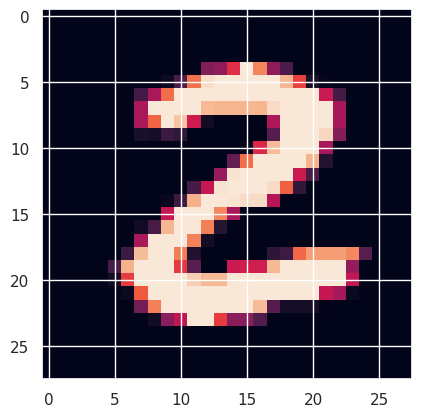

2


In [ ]:
plt.imshow(x_train[25])
plt.show()

print(y_train[25])

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[25]

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

 ])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2944 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1385 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0553 - accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0929 - accuracy: 0.9752


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred[0]

array([2.0048797e-02, 6.8012848e-02, 4.9129105e-01, 9.1089588e-01,
       8.1036154e-07, 3.4307630e-03, 8.8187075e-09, 9.9999952e-01,
       1.5125684e-01, 4.8730236e-01], dtype=float32)

In [ ]:
y_pred_label=np.argmax(y_pred[0])

print(y_pred_label)

7


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [ ]:
y_pred_labels

In [ ]:
con_mat=confusion_matrix(y_test,y_pred_labels)

In [ ]:
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    2,    3,    5,    1,    2,    1],
       [   0, 1130,    0,    0,    0,    1,    2,    1,    1,    0],
       [   4,   10,  989,    8,    2,    0,    3,    7,    8,    1],
       [   0,    0,    2,  990,    0,    4,    0,    8,    4,    2],
       [   0,    2,    3,    0,  966,    1,    4,    2,    0,    4],
       [   1,    1,    0,    8,    1,  872,    5,    2,    1,    1],
       [   2,    4,    2,    0,    3,    1,  946,    0,    0,    0],
       [   1,    8,   10,    2,    1,    0,    0,  997,    4,    5],
       [   3,    0,    3,   15,    6,    9,    1,    2,  933,    2],
       [   2,    8,    0,    7,   16,    4,    0,    6,    3,  963]],
      dtype=int32)>

Text(0.5, 43.249999999999986, 'Predicted label')

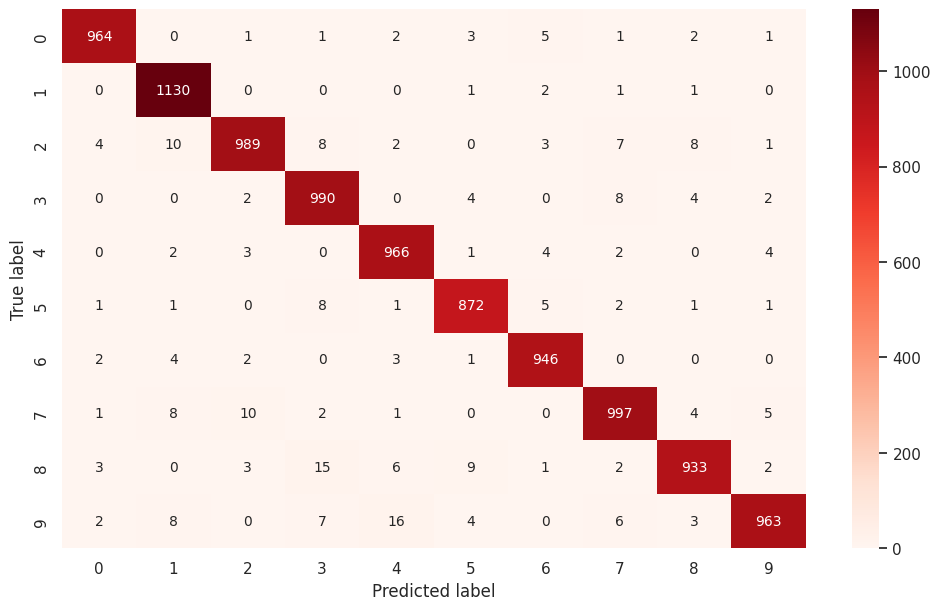

In [ ]:
sns.set()
plt.figure(figsize=(12,7))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Reds',annot_kws={'size':10})
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
image_path='/content/sample_image.png'

In [ ]:
input_img=cv2.imread(image_path)

In [ ]:
input_img

In [ ]:
grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale


array([[250, 250, 198, ..., 250, 255, 255],
       [250, 250, 198, ..., 250, 255, 255],
       [198, 198,   0, ..., 198, 255, 255],
       ...,
       [228, 228,   0, ..., 228, 255, 255],
       [221, 221,   0, ..., 221, 255, 255],
       [221, 221,   0, ..., 221, 255, 255]], dtype=uint8)

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
gray_img=cv2.resize(grayscale,(28,28))

In [ ]:
gray_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  80, 185, 157, 155,  59,  37,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 221, 255, 252, 255, 255, 244, 198,
        198, 198, 198, 198, 198, 198, 198, 167,  50,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 115,  68, 116, 160, 226, 254,
        224, 255, 254, 254, 250, 228, 252, 254, 135,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  63,
         12,  67,  67,  67,  59,  24, 234, 253, 104,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 253, 206,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  20, 230, 255,  89,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 255, 231,  45,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 248, 255,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 132, 254, 185,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 203, 249,  59,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 123, 254, 178,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  79, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         18, 221, 255, 167,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        199, 251, 217,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        255, 254,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 226,
        251, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 132, 253,
        253,  55,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
gray_img_resize=gray_img/255

In [ ]:
gray_img_resize

In [ ]:
gray_img_reshape=np.reshape(gray_img_resize,[1,28,28])

In [ ]:
gray_img_reshape

In [ ]:
input_pred=model.predict(gray_img_reshape)

1/1 [==============================] - 0s 21ms/step


In [ ]:
input_pred

array([[2.0182466e-02, 6.9260590e-02, 4.8479614e-01, 9.1154301e-01,
        8.0391339e-07, 3.5090814e-03, 9.2813197e-09, 9.9999952e-01,
        1.4797513e-01, 4.8644075e-01]], dtype=float32)

In [ ]:
grayscale_img=[np.argmax(input_pred)]

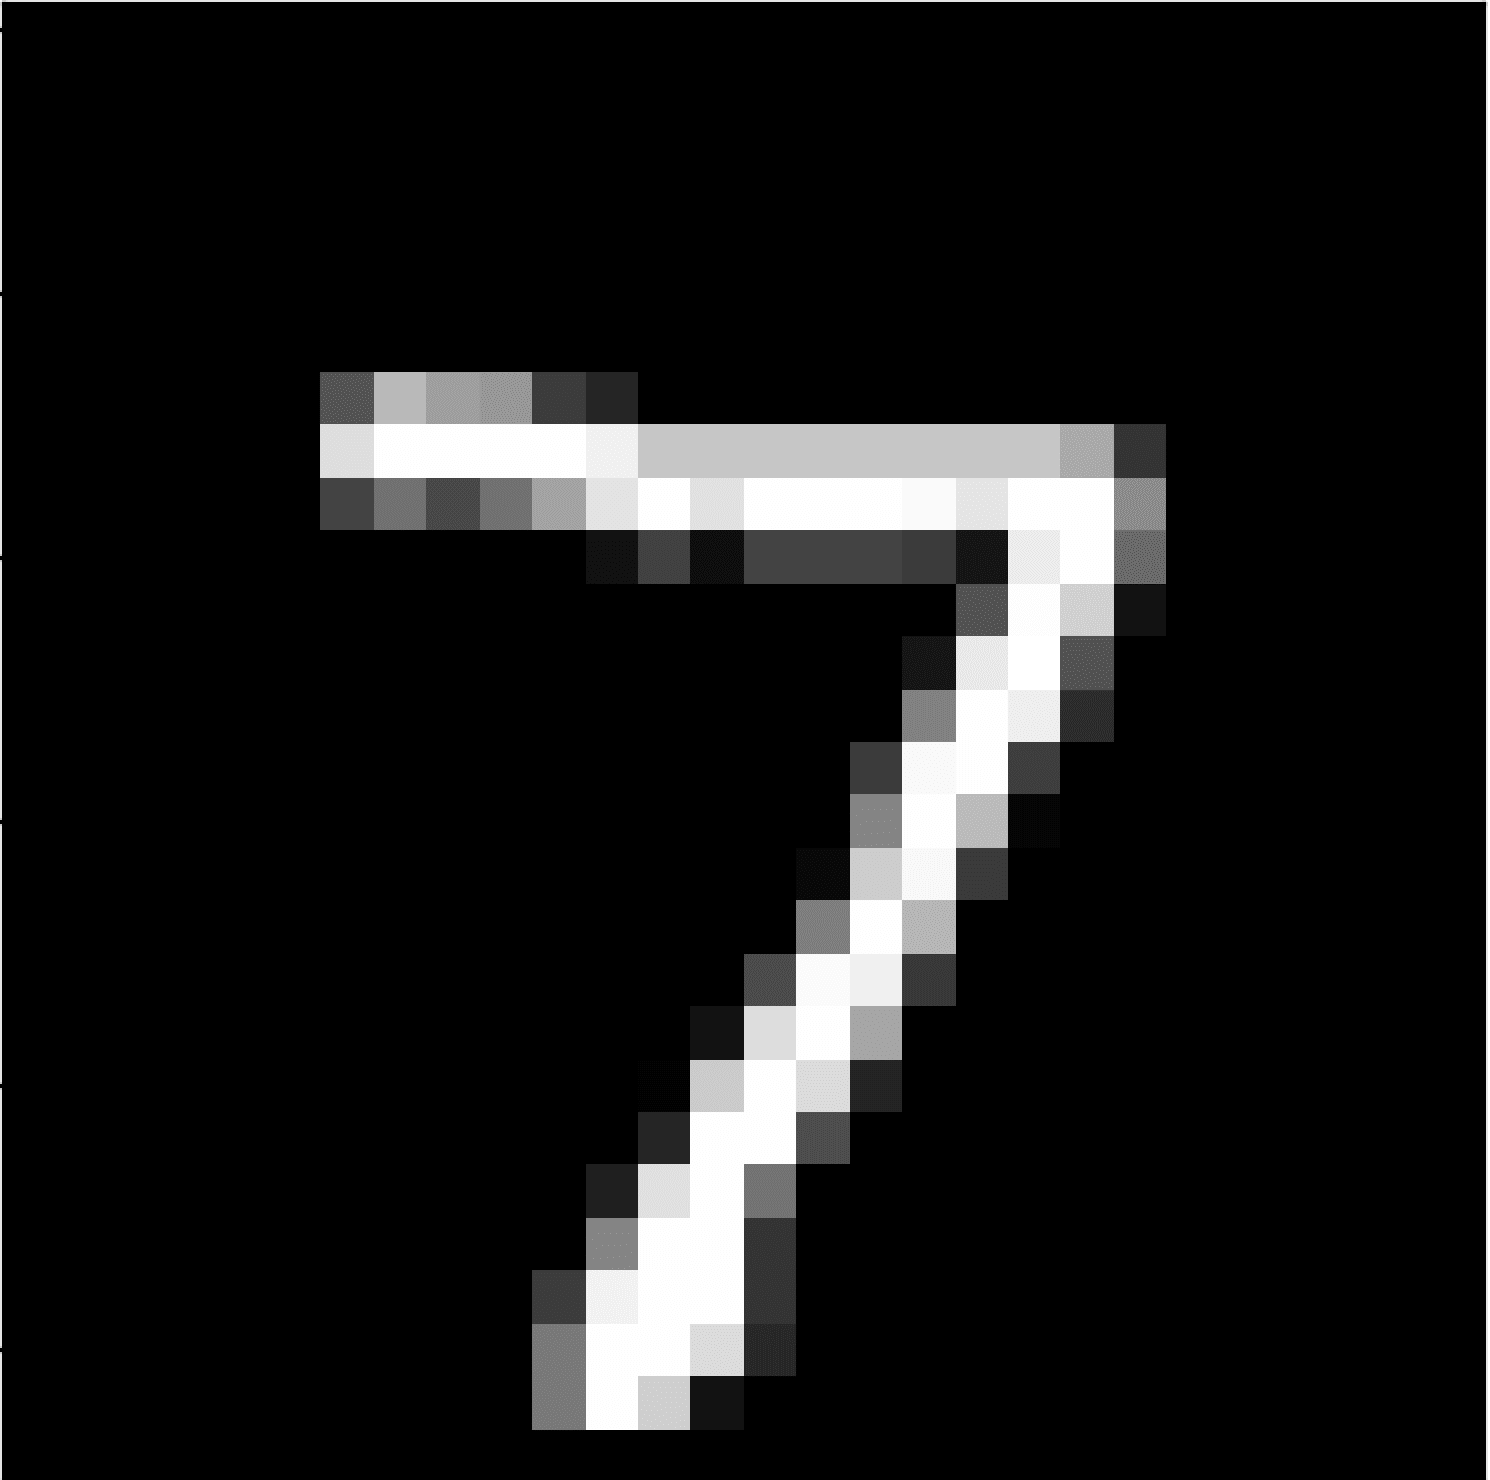

The given image is recognized as : [7]


In [ ]:
cv2_imshow(input_img)
print("The given image is recognized as :",grayscale_img)